In [1]:
# author: Jing
# function: train elastic net
# date: May 8th 2018


In [2]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import scipy.io as sio
from matplotlib.pyplot import savefig
import matplotlib
import pandas as pd


In [83]:
#load gene_clinical data <=  clnical_dataprocessing.ipynb
gc_path = "~/Box/Huang_lab/manuscripts/SomaticImmunePrediction/analysis/codePython/gene_clinical.csv"
gc_ = pd.read_csv(gc_path, dtype='object')
x_label = gc_.columns

gc_data = gc_.values.astype(float)
n = gc_data.shape[0]
d = gc_data.shape[1]

x = gc_data[:,:-1]
y = gc_data[:,-1]
print(x.shape, y.shape)
print(x_label)
print(x[0,:])

(7606, 337) (7606,)
Index(['FEMALE', 'MALE', 'ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'ESCA',
       'GBM',
       ...
       'ZC3H12A', 'ZCCHC12', 'ZFHX3', 'ZFP36L1', 'ZFP36L2', 'ZMYM2', 'ZMYM3',
       'ZNF133', 'ZNF750', 'Leukocyte Fraction'],
      dtype='object', length=338)
[1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   1.   0.44 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.

In [26]:
# run elastic net on pan
ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)
enet_regr.fit(x, y)
coef = np.transpose(enet_regr.coef_)
abs_coef = abs(coef)
abs_sort_list = sorted(range(len(coef)), key = lambda k: abs_coef[k], reverse = True)
print((abs_sort_list))
print((x_label[3]))

[31, 2, 16, 19, 22, 28, 30, 21, 17, 27, 10, 11, 20, 76, 29, 26, 14, 161, 25, 12, 144, 101, 3, 69, 18, 103, 240, 221, 139, 23, 136, 214, 107, 162, 9, 186, 5, 188, 147, 47, 44, 308, 90, 211, 192, 213, 33, 173, 8, 231, 202, 82, 174, 272, 190, 84, 102, 220, 121, 24, 40, 48, 183, 182, 189, 317, 251, 133, 94, 314, 250, 181, 53, 0, 287, 256, 37, 98, 296, 299, 117, 148, 52, 243, 87, 4, 206, 172, 283, 234, 60, 132, 257, 179, 92, 34, 64, 284, 271, 157, 207, 280, 235, 154, 1, 42, 6, 7, 13, 15, 32, 35, 36, 38, 39, 41, 43, 45, 46, 49, 50, 51, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 85, 86, 88, 89, 91, 93, 95, 96, 97, 99, 100, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 137, 138, 140, 141, 142, 143, 145, 146, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 175, 176, 177, 178, 180, 184, 185, 187, 191, 193,

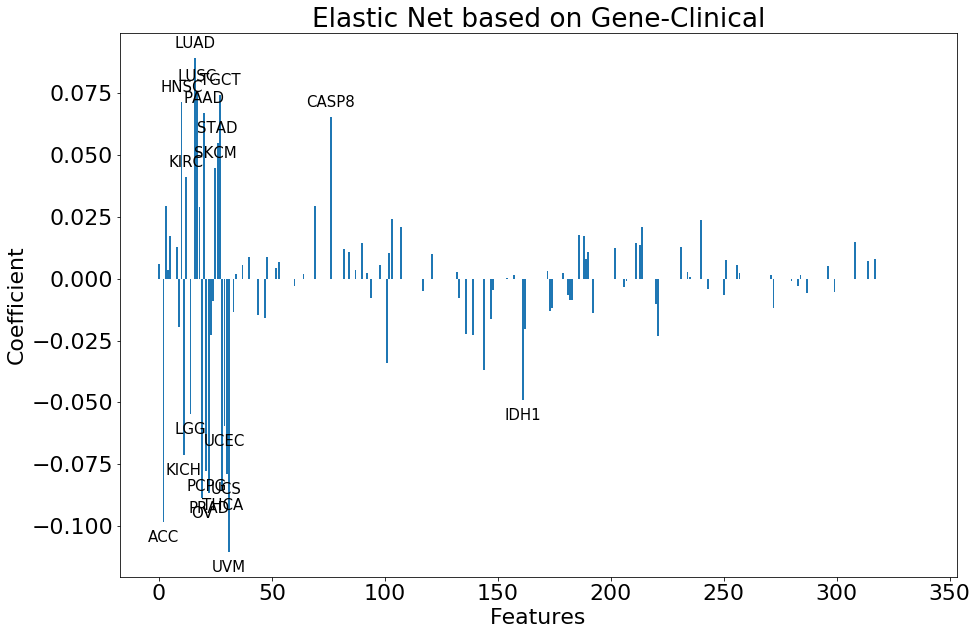

In [47]:
# plot result
method = "Elastic Net"
plt.figure(figsize=(15, 10))
font_size = 22
xlabel = list(range(0,len(coef)))
plt.title(method + " based on Gene-Clinical")
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.bar(xlabel, coef)
matplotlib.rcParams.update({'font.size': 22 })
num_features = 20

k = 0
labels = [x_label[i] for i in abs_sort_list[0:num_features]]
for x_loc,y_loc in zip([xlabel[i] for i in abs_sort_list[0:num_features]], [coef[i] for i in abs_sort_list[0:num_features]]):
    label = labels[k]
    k = k+1
    if (y_loc<0):
        plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15) 
    else:
        plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15) 

plt.savefig("./out/clinical/"+ method + "/" + method + "_gc.pdf", bbox_inches='tight',transparent = False,pad_inches=0.1)
#plt.show()

In [58]:
labels = [x_label[i] for i in abs_sort_list[0:num_features]]
print(labels)
print(abs_sort_list[0:num_features])
print(x_label[76], x_label[161])
# save data
import pickle

plot_file = "./out/clinical/"+ method + "/" + method + "_gc.pkl"
with open(plot_file, 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([coef, x_label], f)


['UVM', 'ACC', 'LUAD', 'OV', 'PRAD', 'THCA', 'UCS', 'PCPG', 'LUSC', 'TGCT', 'HNSC', 'KICH', 'PAAD', 'CASP8', 'UCEC', 'STAD', 'LGG', 'IDH1', 'SKCM', 'KIRC']
[31, 2, 16, 19, 22, 28, 30, 21, 17, 27, 10, 11, 20, 76, 29, 26, 14, 161, 25, 12]
CASP8 IDH1


In [134]:
np.where(x_label=='ACC')
np.where(x_label == 'UVM')
cancer_names = x_label[2:32]
print(cancer_names)
cancer_data = x[:,2:32]
print(cancer_data.shape)
nx = x
nx = np.delete(nx,list(range(2,32)), axis=1)
print(x.shape, nx.shape)
print(x_label)
print(nx[0,:])
nx_label = x_label
nx_label = np.delete(nx_label, list(range(2,32)))
print(len(nx_label))

Index(['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'ESCA', 'GBM', 'HNSC',
       'KICH', 'KIRC', 'KIRP', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV',
       'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA',
       'UCEC', 'UCS', 'UVM'],
      dtype='object')
(7606, 30)
(7606, 337) (7606, 307)
Index(['FEMALE', 'MALE', 'ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'ESCA',
       'GBM',
       ...
       'ZC3H12A', 'ZCCHC12', 'ZFHX3', 'ZFP36L1', 'ZFP36L2', 'ZMYM2', 'ZMYM3',
       'ZNF133', 'ZNF750', 'Leukocyte Fraction'],
      dtype='object', length=338)
[1.   0.   0.   0.   0.   0.   1.   0.44 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.


In [125]:
cancer_index = np.where(cancer_data[:,i]==1)
a=nx[np.where(cancer_data[:,0]==1)]
a[0]

array([1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.44, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

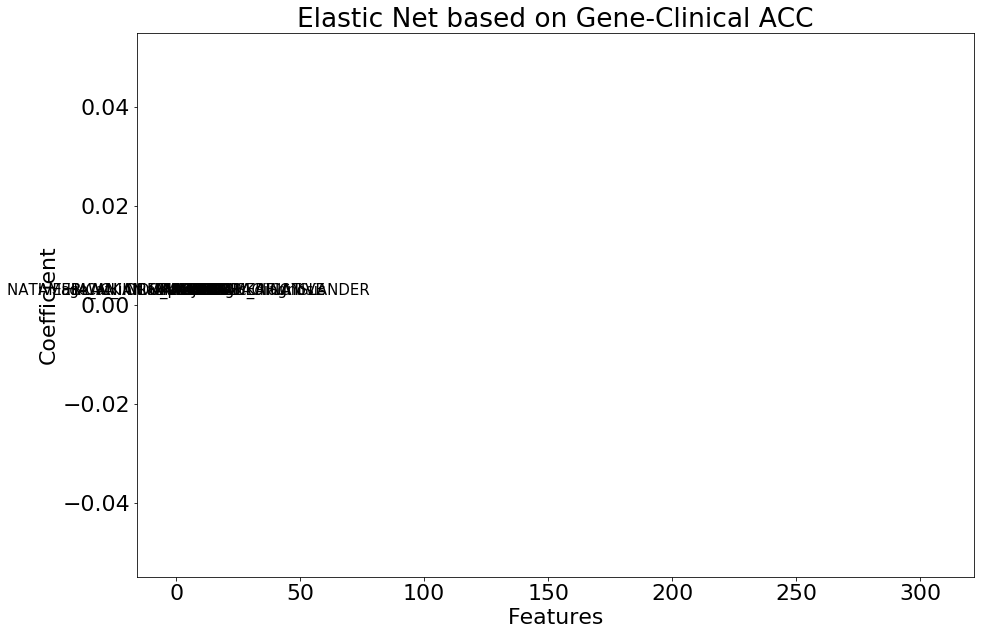

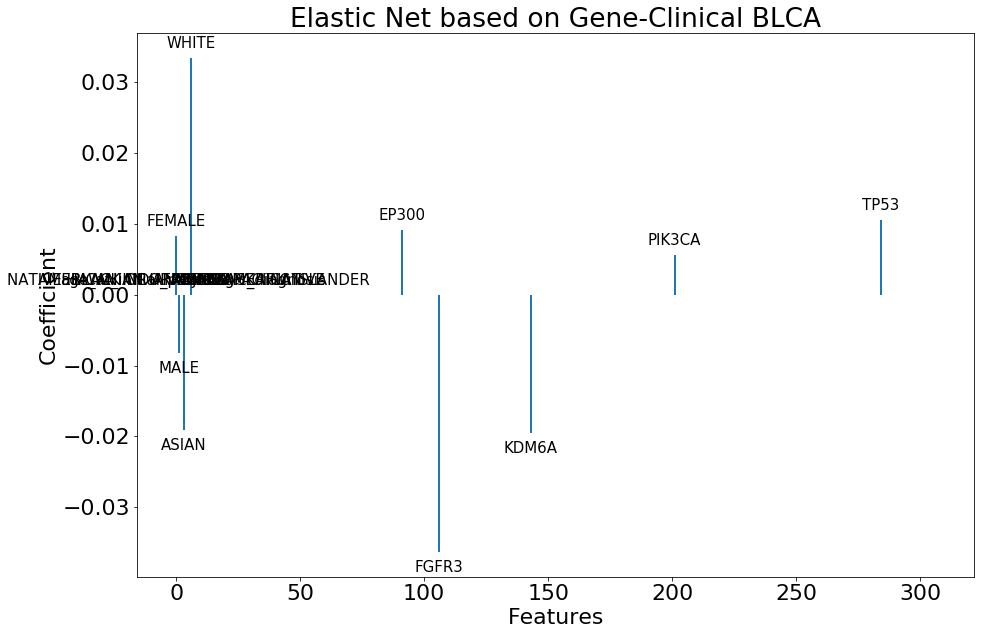

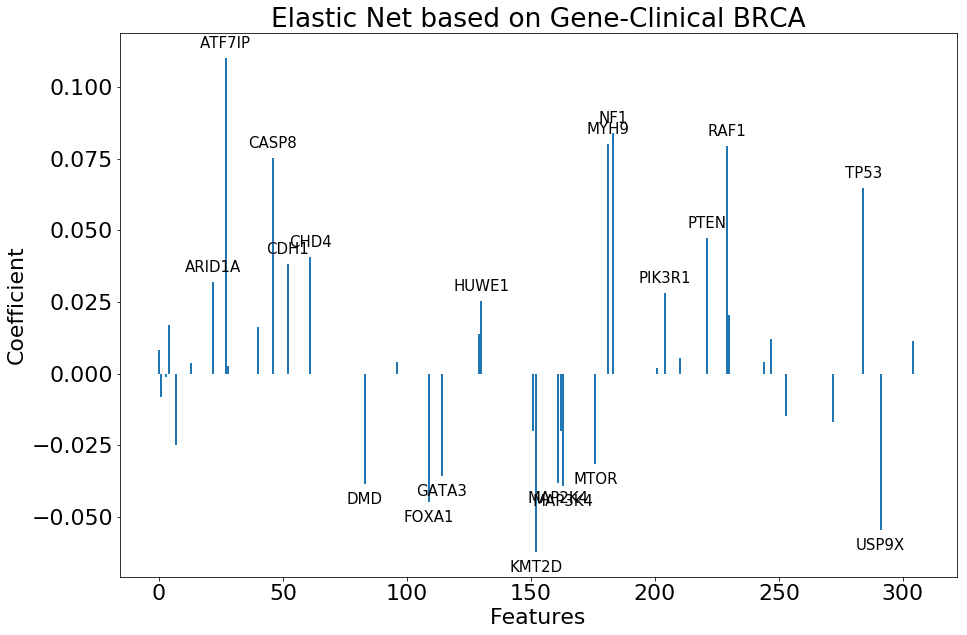

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

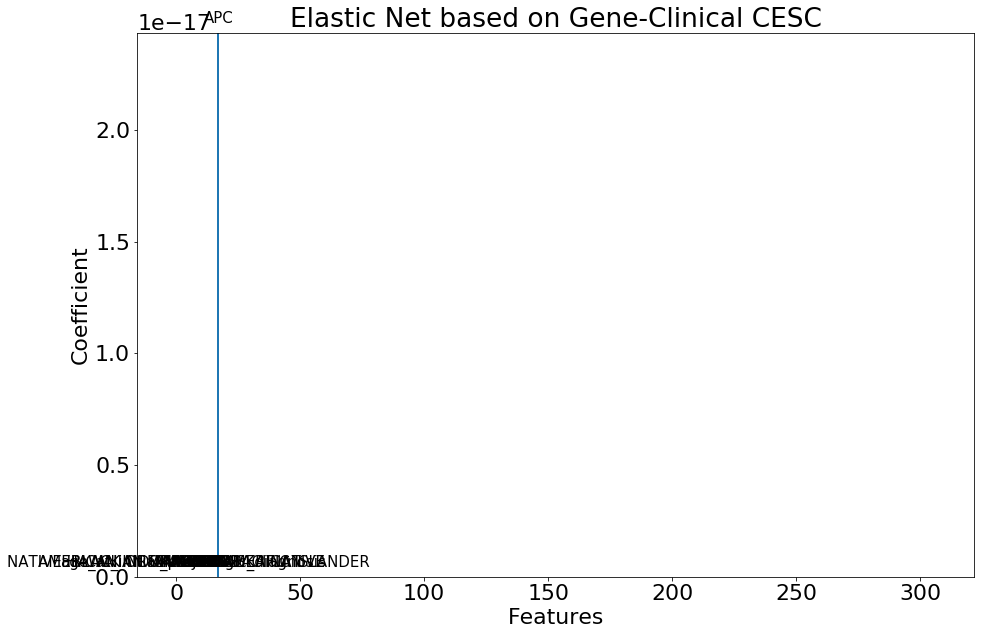

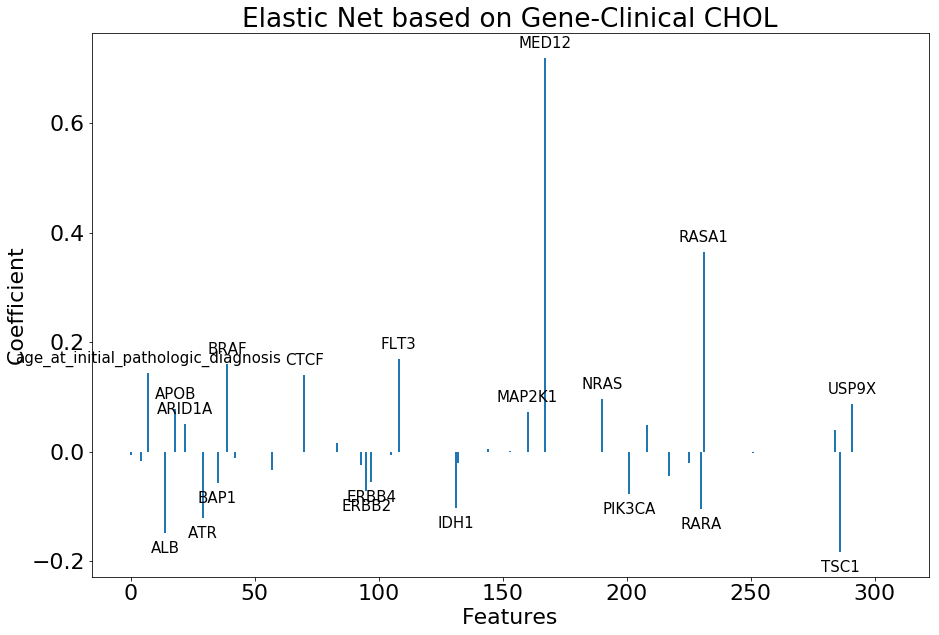

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

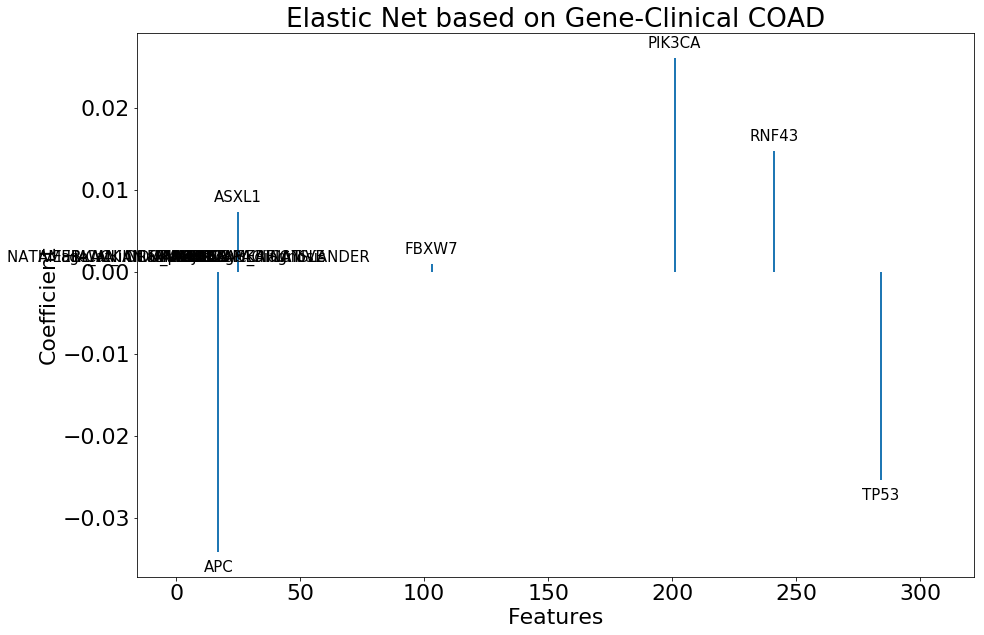

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

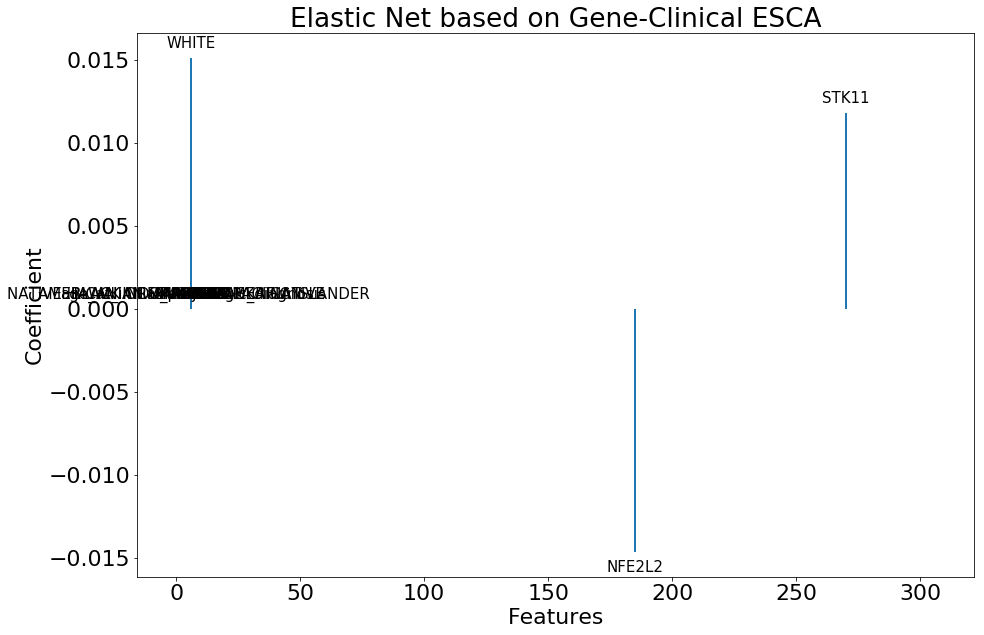

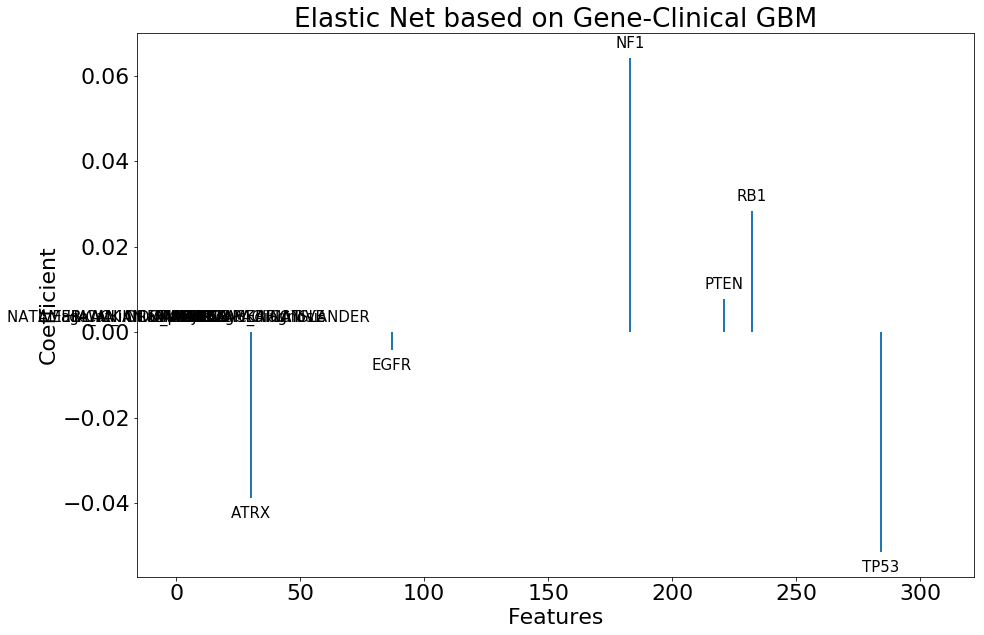

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


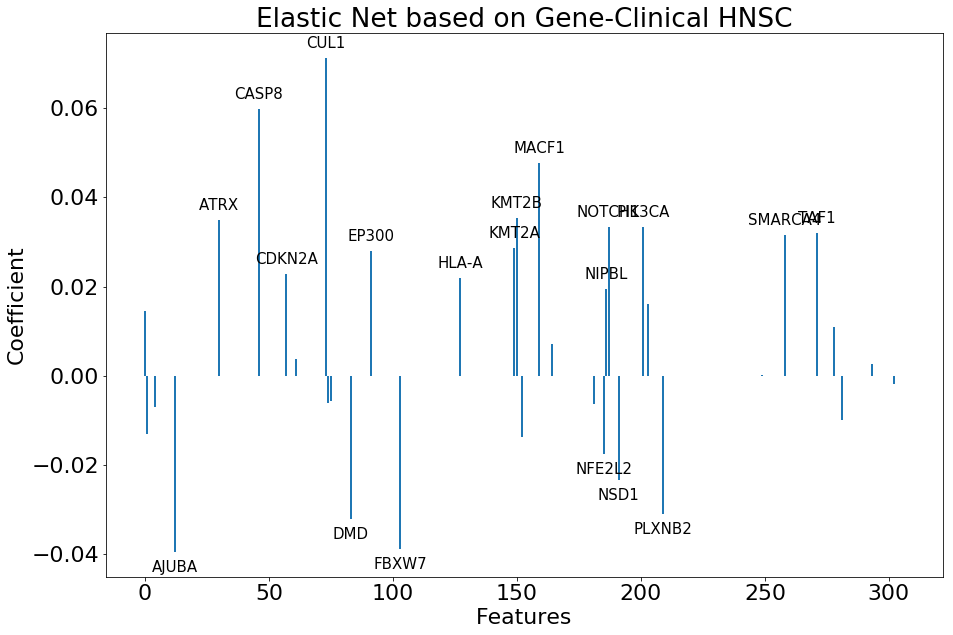

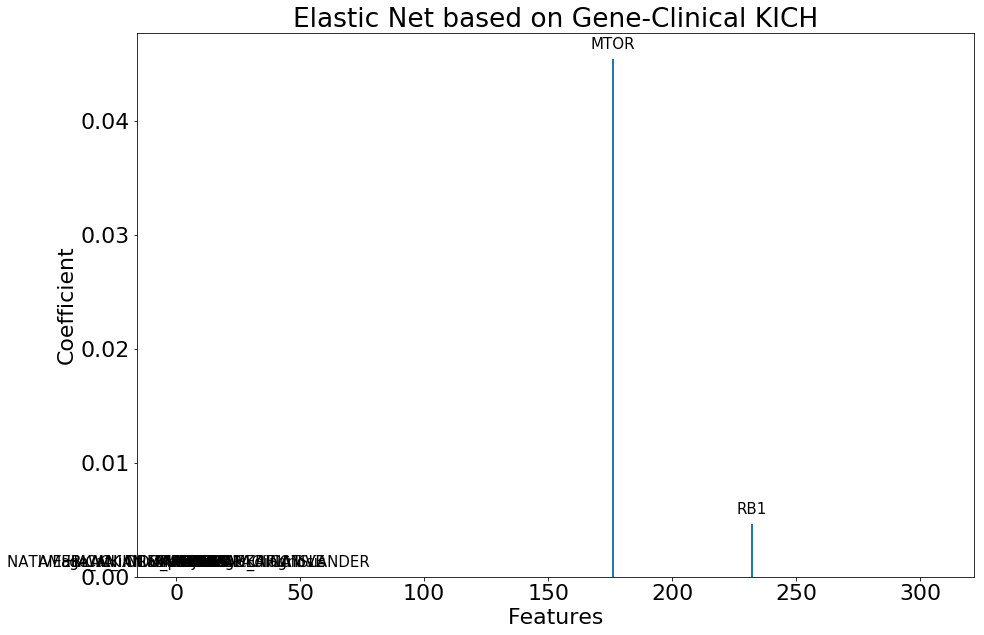

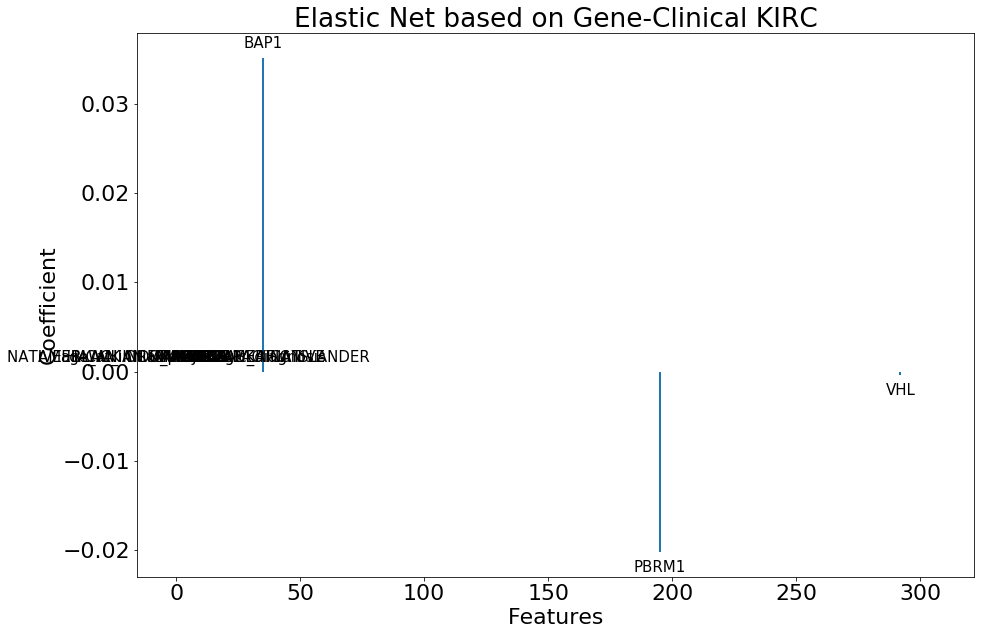

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


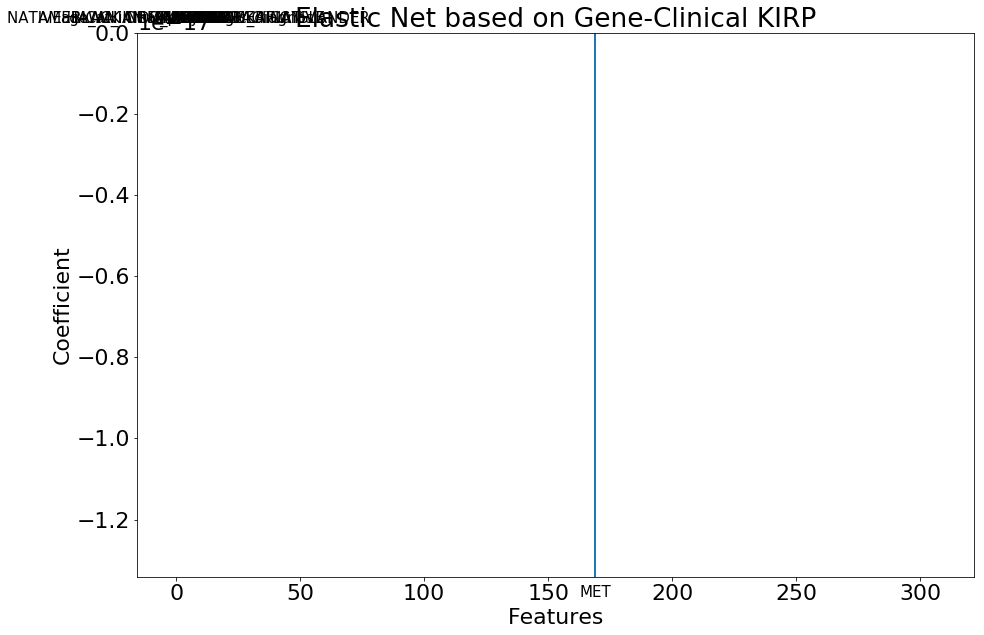

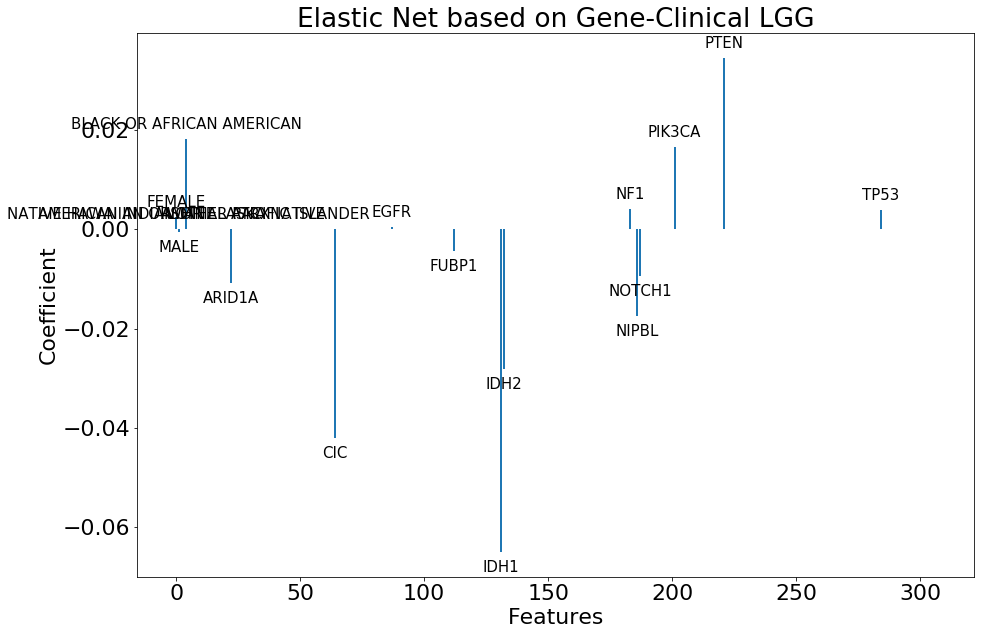

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


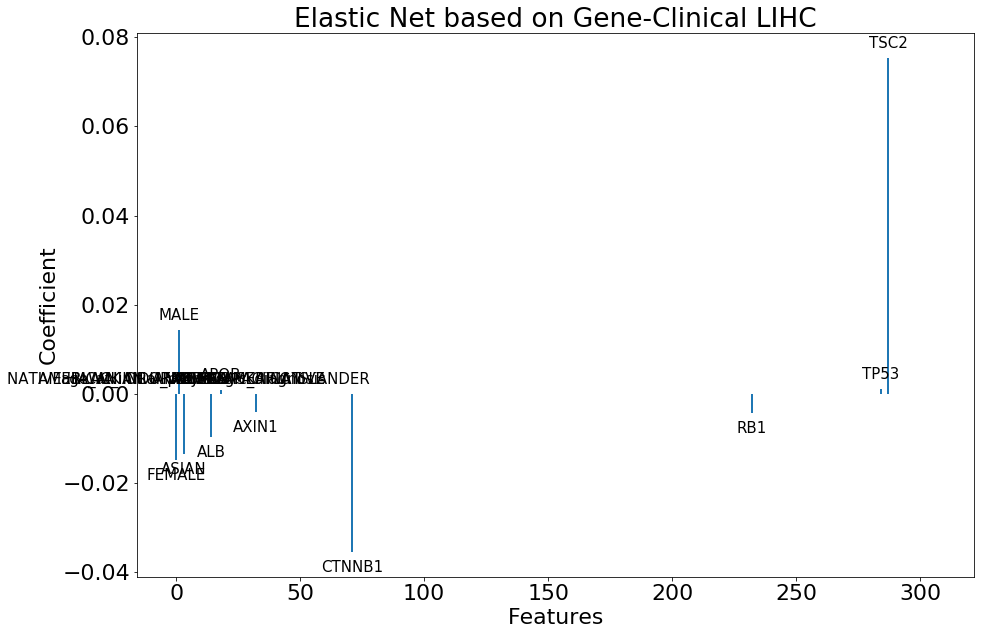

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


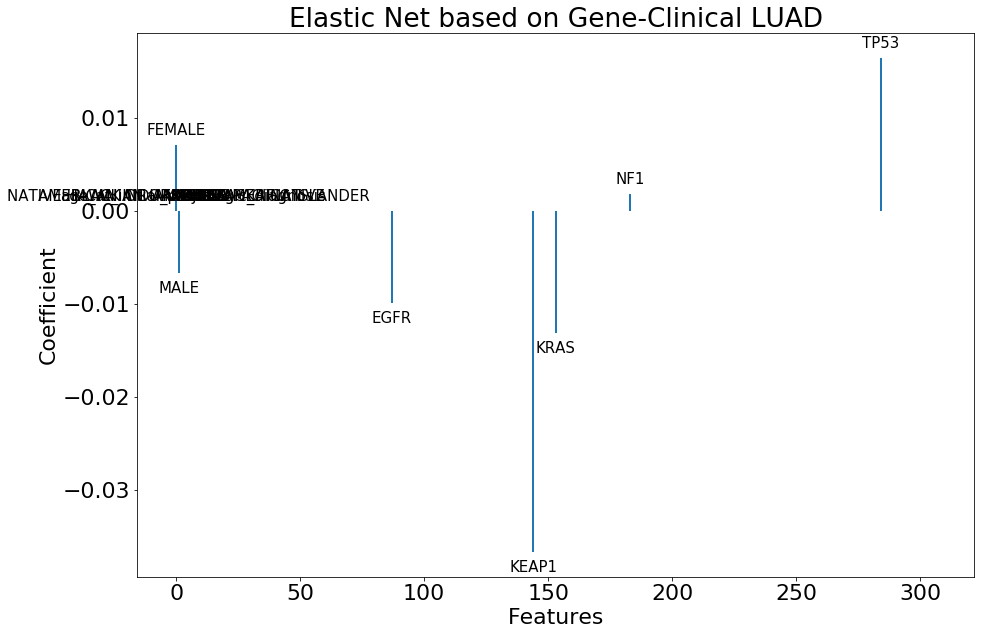

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


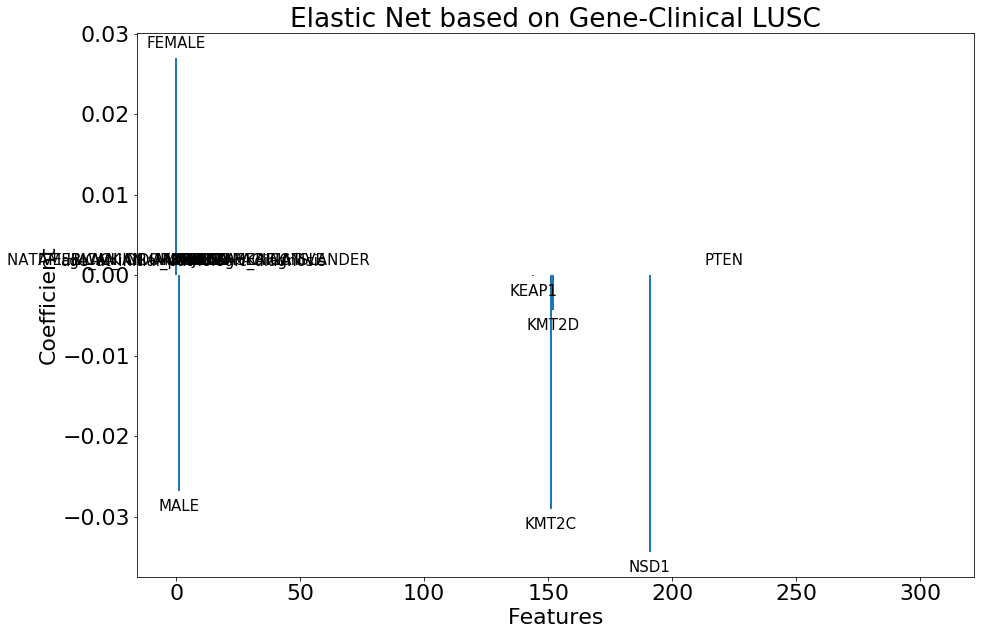

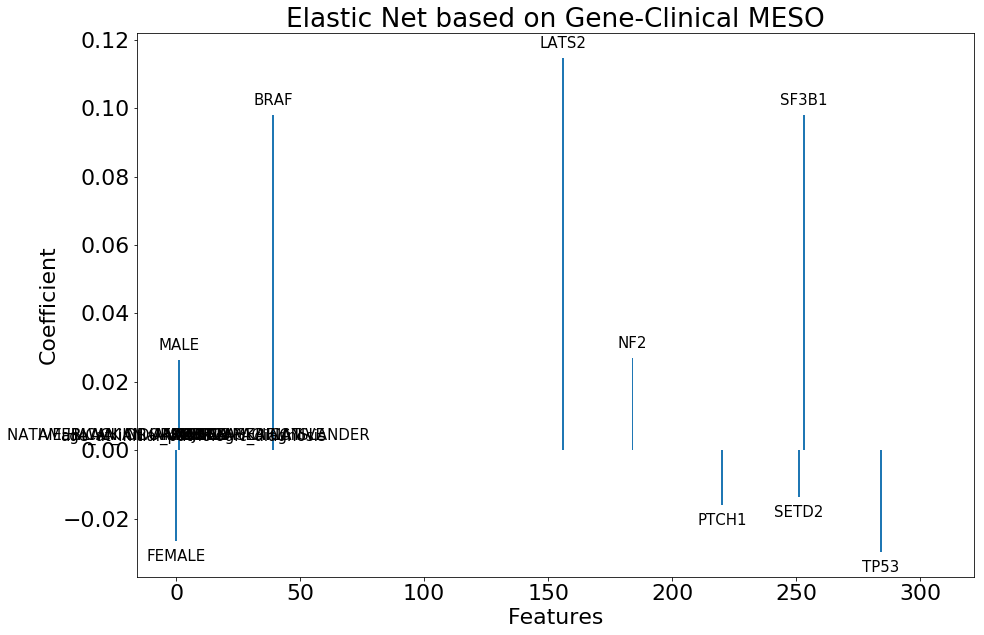

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


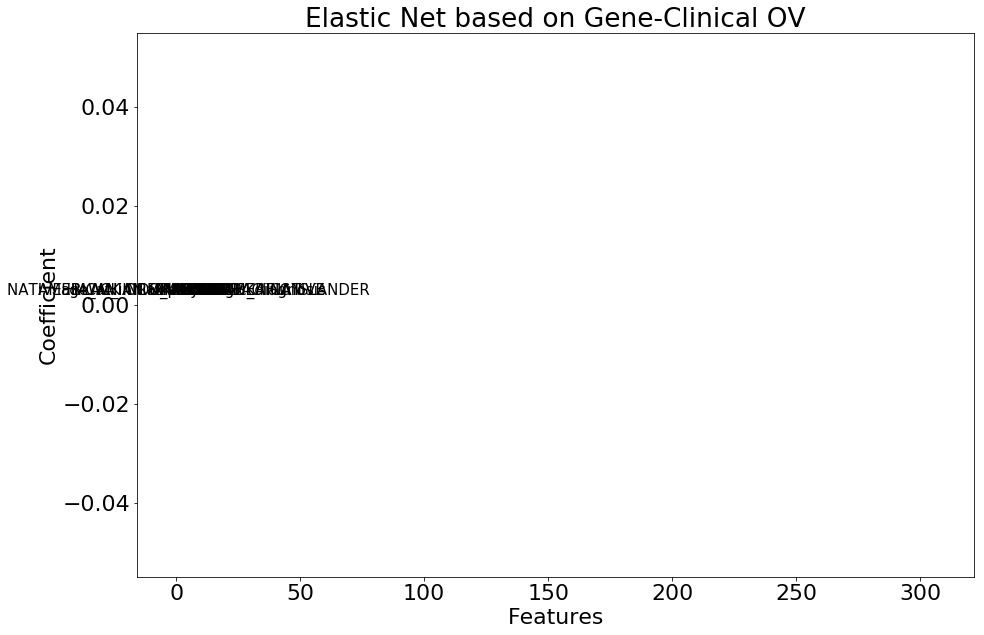

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


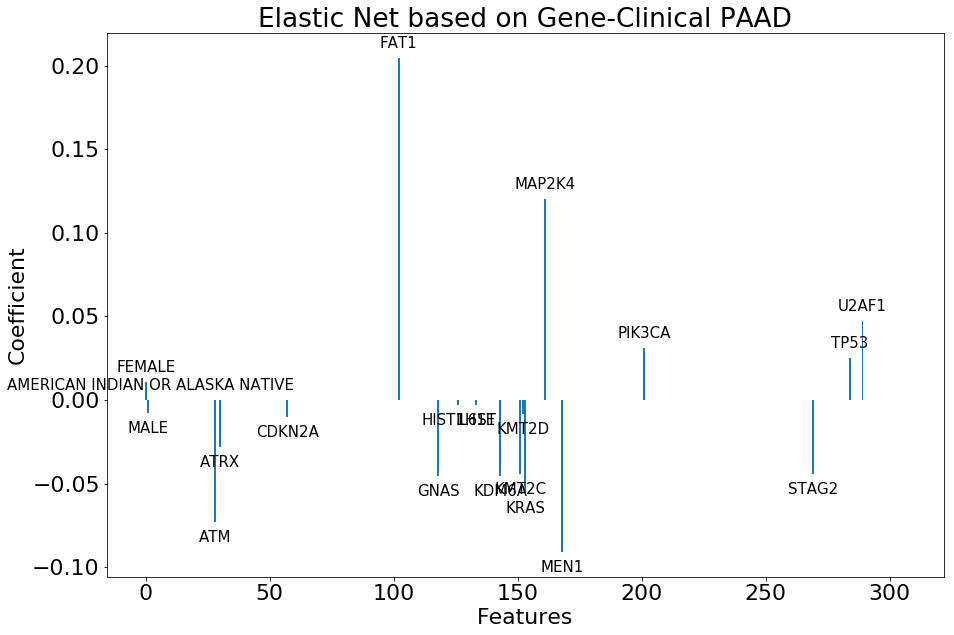

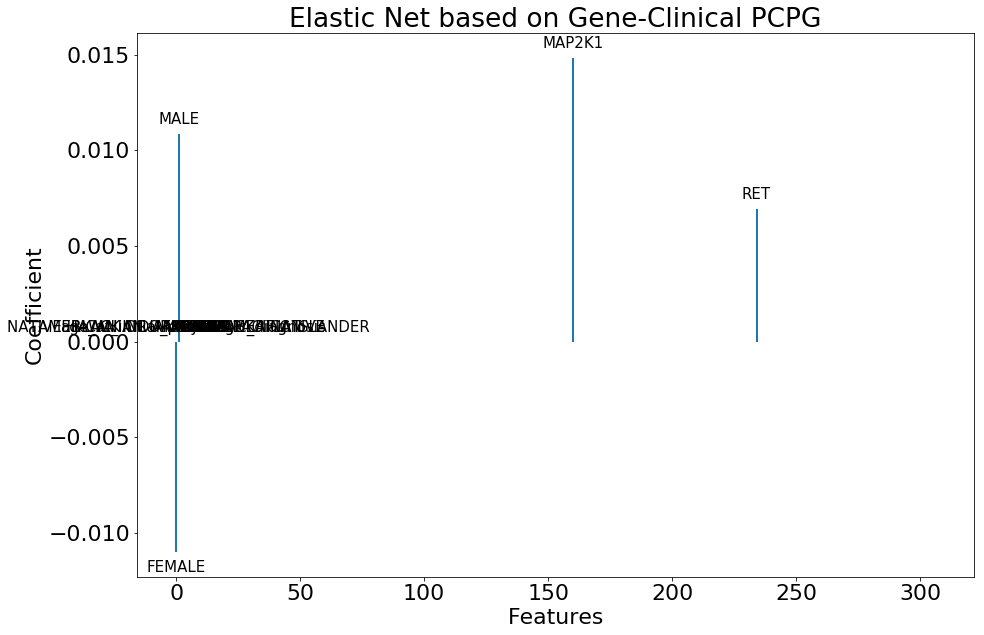

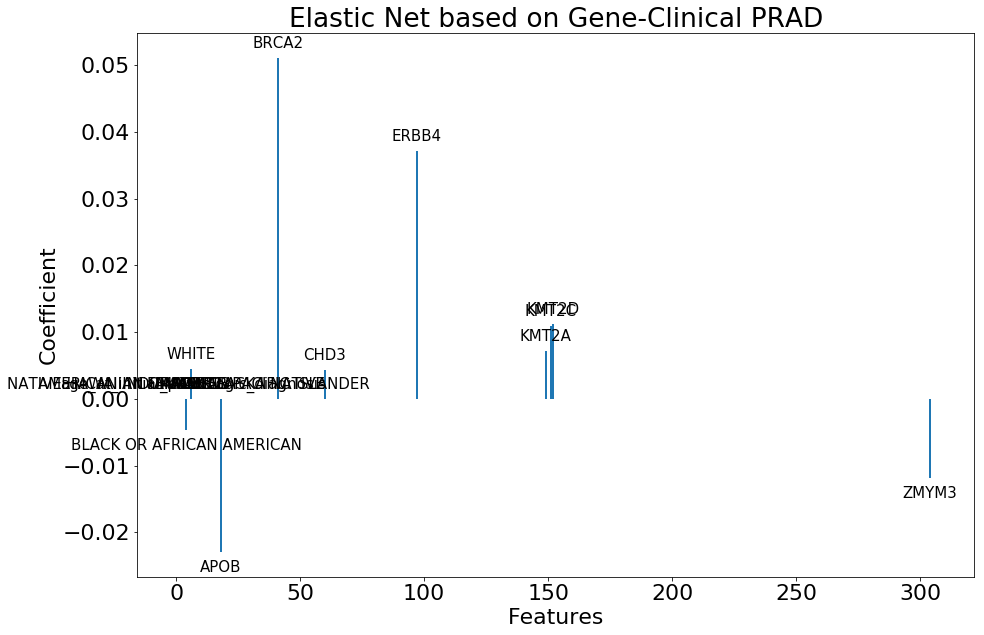

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


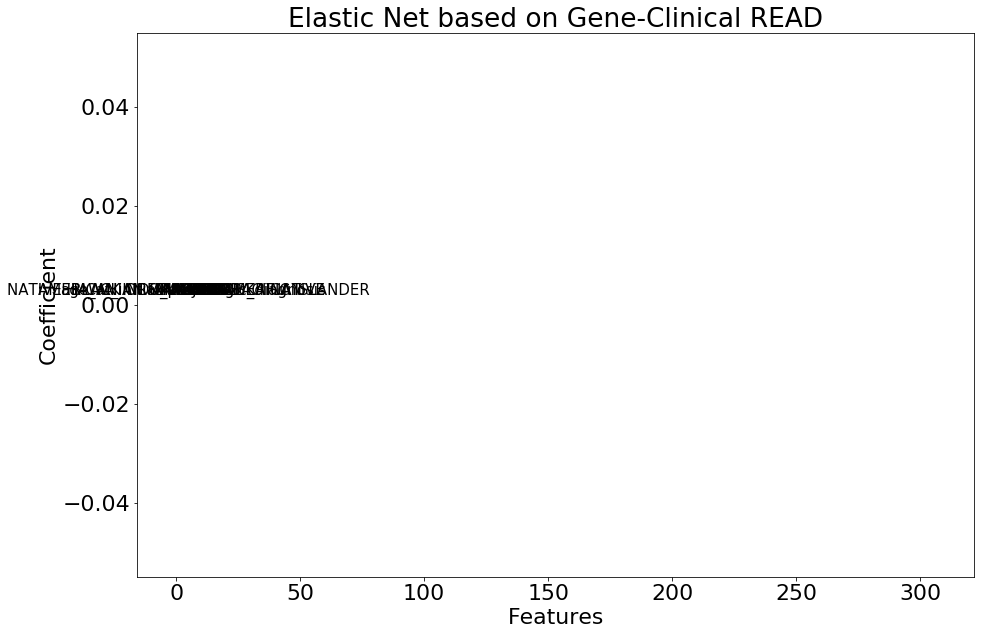

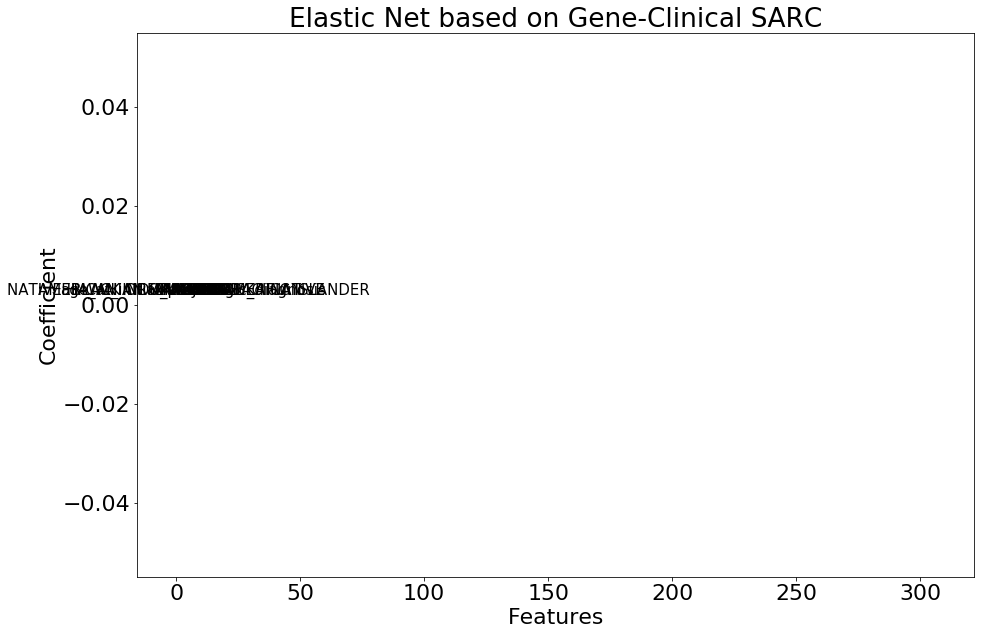

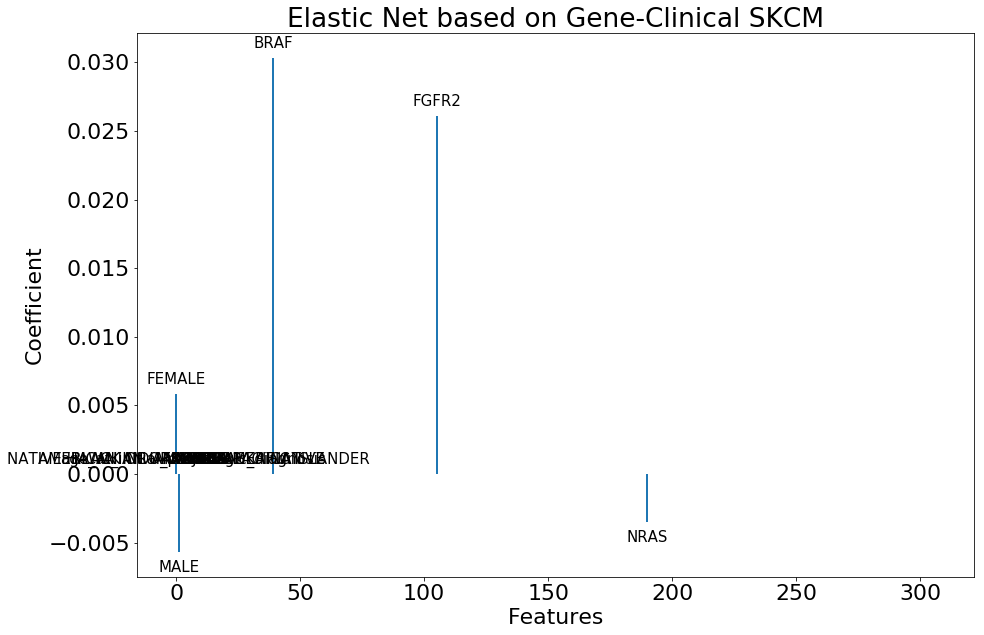

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


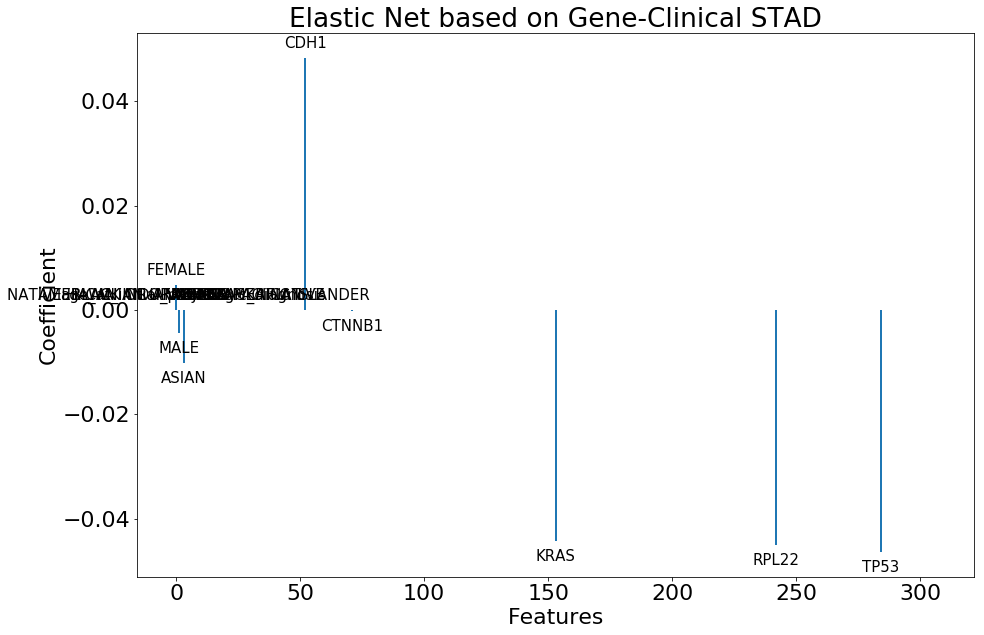

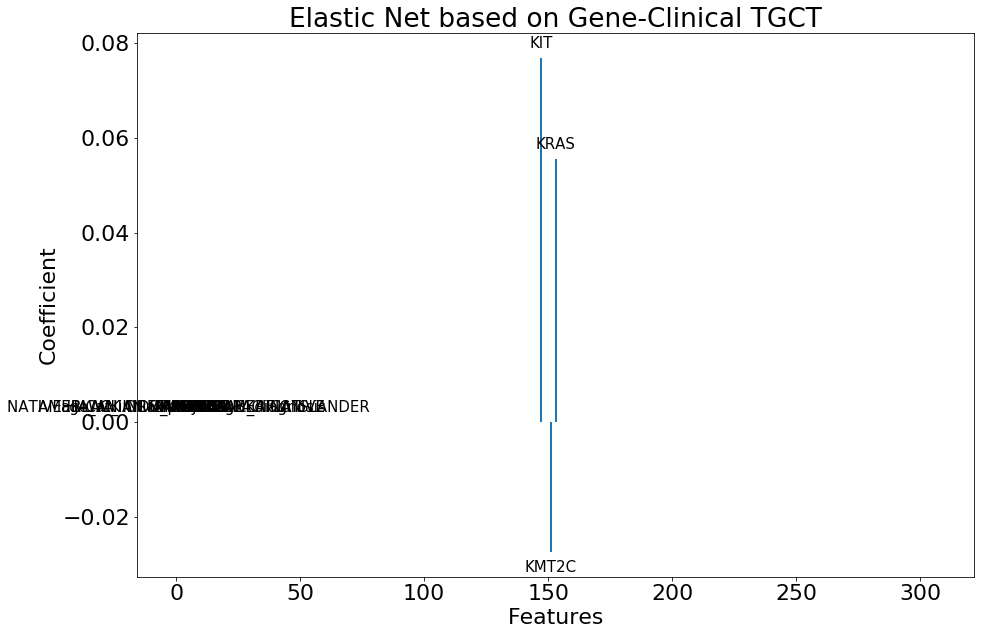

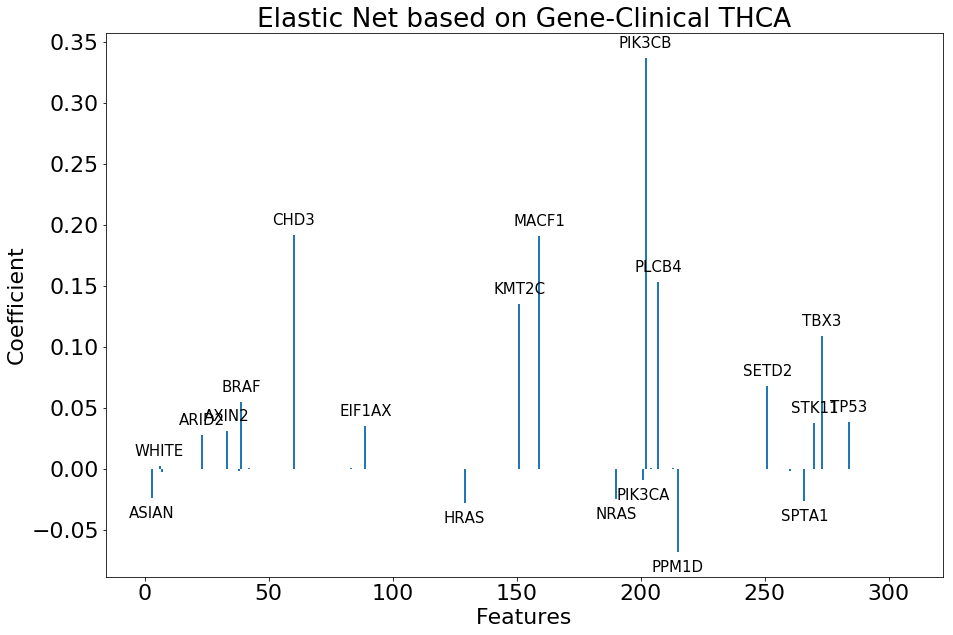

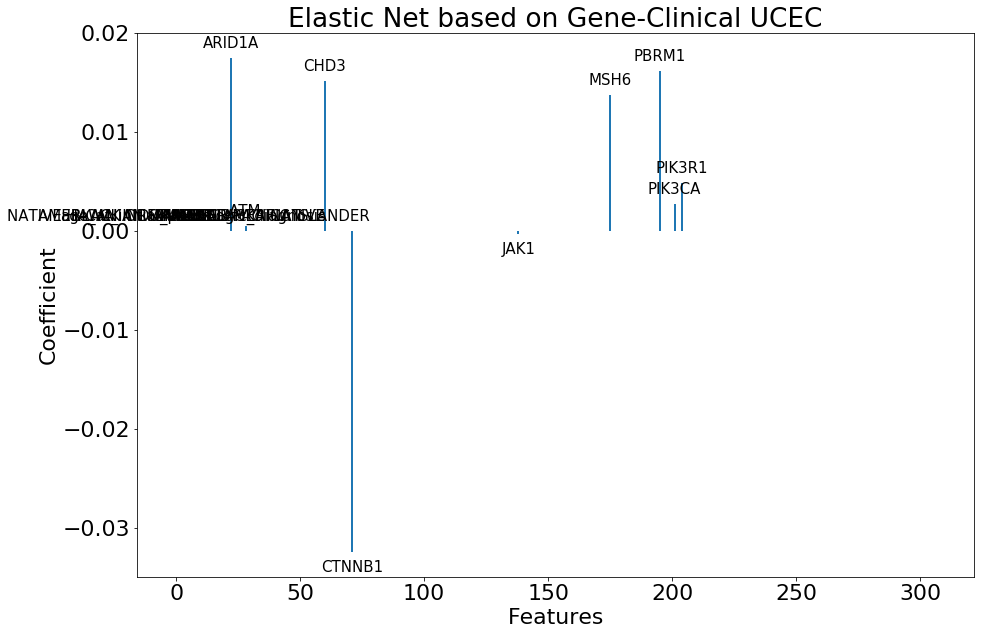

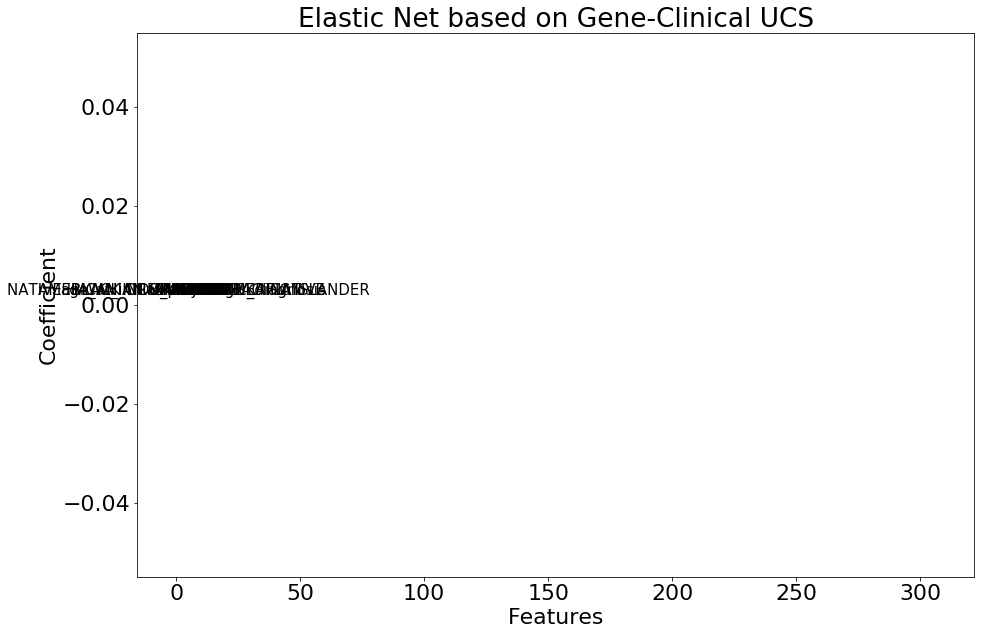

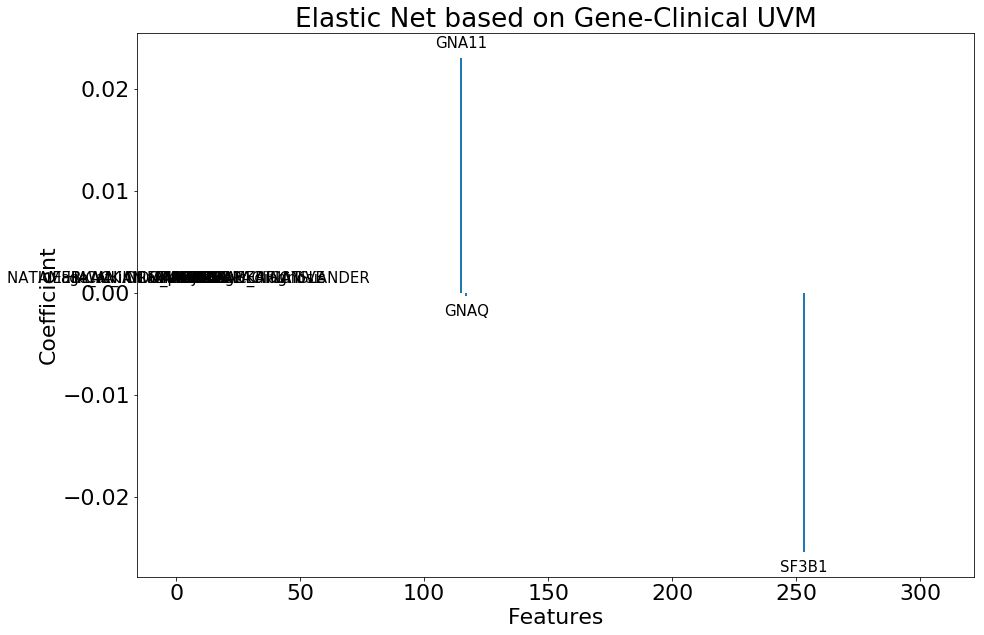

In [136]:
# elastic net on samples following to one TCGA Study
font_size = 22

num_features = 20
cancer_coeffs = [] 
for i in range(0, len(cancer_names)):
    name = cancer_names[i]
    
    enet_regr = ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)
    enet_regr.fit(nx[np.where(cancer_data[:,i]==1)], y[np.where(cancer_data[:,i]==1)])
    cancer_coef = np.transpose(enet_regr.coef_)
    cancer_abs_coef = abs(cancer_coef)
    cancer_absSortlist = sorted(range(len(cancer_abs_coef)), key=lambda k: cancer_abs_coef[k],reverse = True)
    #print (len(cancer_coef))
  
    
    plt.figure(figsize=(15, 10))
    plt.title(method + " based on Gene-Clinical "+ name)
    plt.xlabel('Features')
    plt.ylabel('Coefficient')
    #plt.yticks(2)
    xlabel = list(range(0,len(cancer_coef))) 
    plt.bar(xlabel, cancer_coef)
    matplotlib.rcParams.update({'font.size': 22 })
    labels = [nx_label[l] for l in cancer_absSortlist[0:num_features]]
    k = 0
    for x_loc,y_loc in zip([xlabel[i] for i in cancer_absSortlist[0:num_features]], [cancer_coef[i] for i in cancer_absSortlist[0:num_features]]):
        label = labels[k]
        k = k+1
        if (y_loc<0):
            plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15)
        
        else:
            plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15)
           
    plt.savefig("./out/clinical/"+ method + "/" + cancer_names[i] + "_"+method+"_gene_gc.pdf", bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
    plt.show()

In [135]:
print(len(cancer_coef))

307
